In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [180]:
df = pd.read_csv('./Data/framingham.csv')
df.rename(columns={'male':'gender'},inplace=True)

In [181]:
df

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


`2. EDA: `
- performed on both train & test

In [182]:
df['TenYearCHD'] = df['TenYearCHD'].replace(0,'No').replace(1,'Yes')
df['gender'] = df['gender'].replace(0,'Female').replace(1,'Male')
df['currentSmoker'] = df['currentSmoker'].replace(0,'No').replace(1,'Yes')
df['BPMeds'] = df['BPMeds'].replace(0,'No').replace(1,'Yes')
df['prevalentStroke'] = df['prevalentStroke'].replace(0,'No').replace(1,'Yes')
df['prevalentHyp'] = df['prevalentHyp'].replace(0,'No').replace(1,'Yes')
df['diabetes'] = df['diabetes'].replace(0,'No').replace(1,'Yes')

In [183]:
import matplotlib.container as mc
def cat_vis(x,hue,f=18,g=10):
    plt.figure(figsize=(12,5))
    g_t = []
    ax = sns.countplot(data=df,x=x,hue=hue,palette='mako',width=0.5)
    for i in range(df[ax.get_legend().get_title().get_text()].nunique()):
        for j in range(df[ax.get_xlabel()].nunique()):
            globals()['__' + str(i) + str(j)] =  int(str(plt.bar_label(ax.containers[i])[j]).split("'")[1])
            g_t.append(globals()['__' + str(i) + str(j)])

    labels = [mc.Container.get_label(ax.containers[x]) for x in range(df[ax.get_legend().get_title().get_text()].nunique())]
    titles = [str(ax.get_xticklabels()[x]).split("'")[1] for x in range(df[ax.get_xlabel()].nunique())]
    total = [sum(g_t[x::len(g_t)//2]) for x in range(df[ax.get_xlabel()].nunique())]
    data = [g_t[x::len(g_t)//2] for x in range(df[ax.get_xlabel()].nunique())]
    color = sns.color_palette('pastel')
    plt.figure(figsize=(f,g))
    ax1 = plt.subplot2grid((df[ax.get_xlabel()].nunique(),2),(0,0))
    plt.pie(total,labels=titles,autopct='%0.2f%%',colors=color)
    plt.title(ax.get_xlabel())
    ax1 = plt.subplot2grid((df[ax.get_xlabel()].nunique(),2),(0,1))
    grand_labels = [x+" & " +y for x in labels for y in titles]
    plt.pie(g_t,labels=grand_labels,autopct='%0.2f%%',colors=color)
    plt.title('Corelation')
    t,j = 1,0
    for i in range(df[ax.get_xlabel()].nunique()):
        if j == 2:
            t+=1
            j = 0
        ax1 = plt.subplot2grid((df[ax.get_xlabel()].nunique(),2),(t,j))
        plt.title(titles[i])
        plt.pie(data[i],labels=labels, autopct='%0.2f%%',colors=color)
        j+=1
    plt.show()

Text(0.5, 1.0, 'Target distribution')

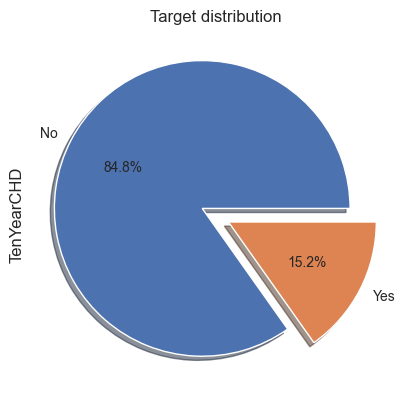

In [184]:
# target_distribution
df['TenYearCHD'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':10}).set_title("Target distribution")

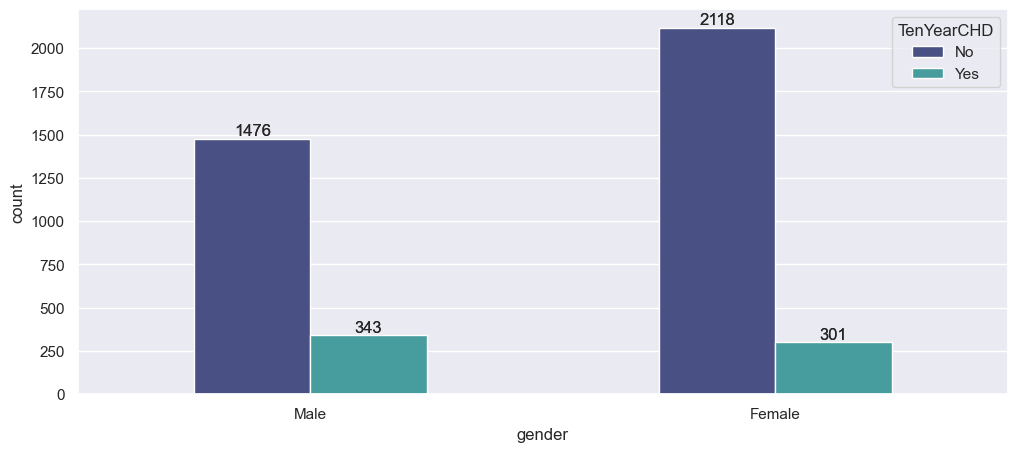

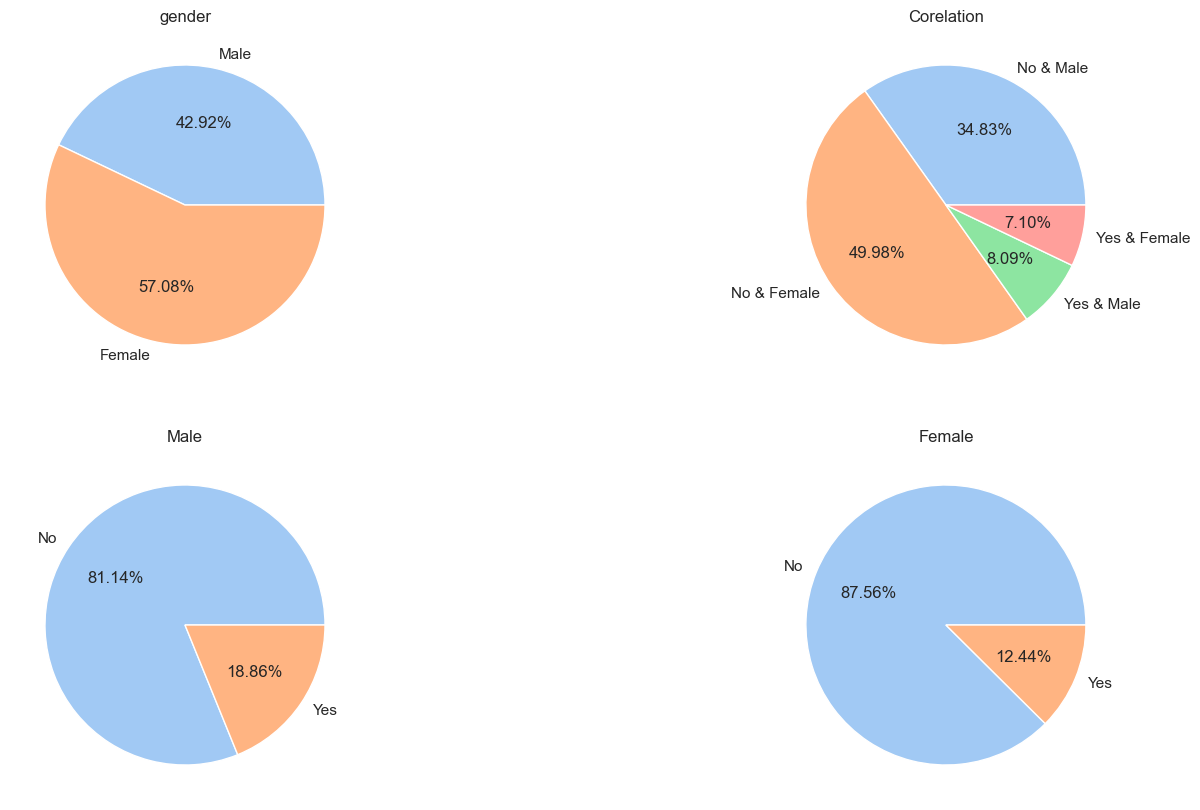

In [185]:
cat_vis('gender','TenYearCHD')

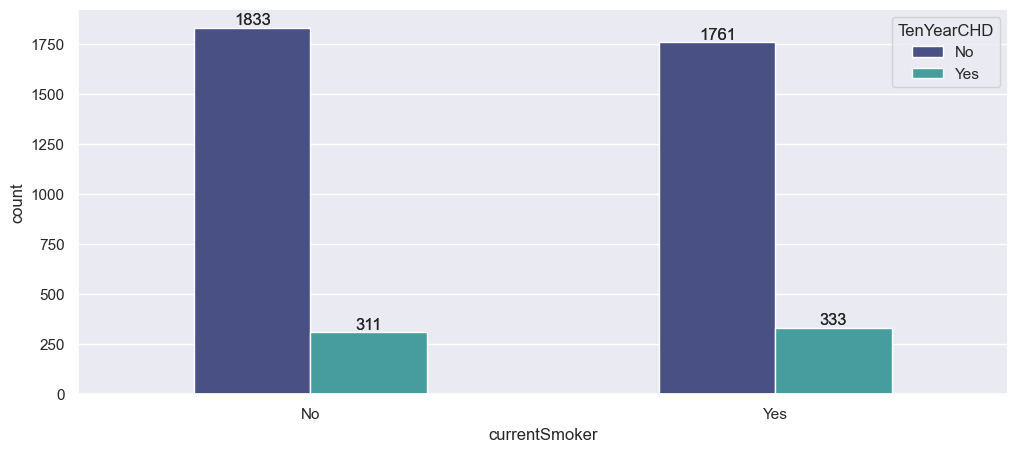

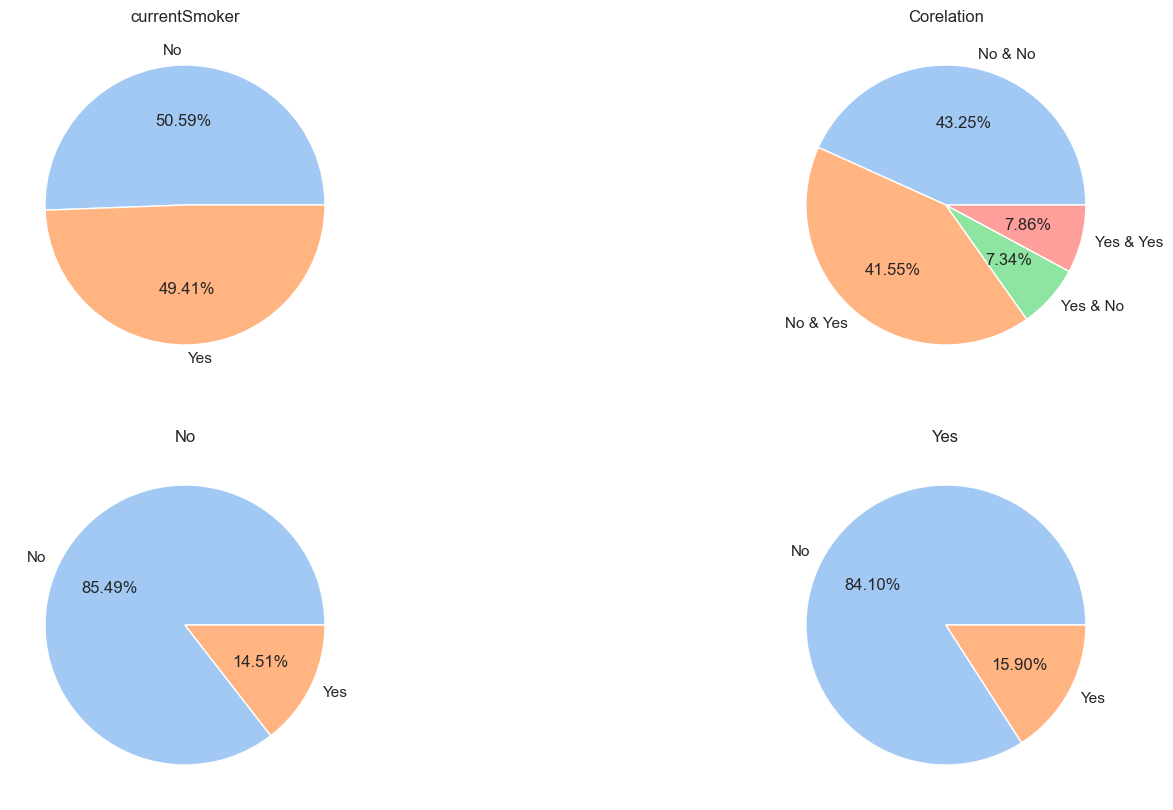

In [186]:
cat_vis('currentSmoker','TenYearCHD')

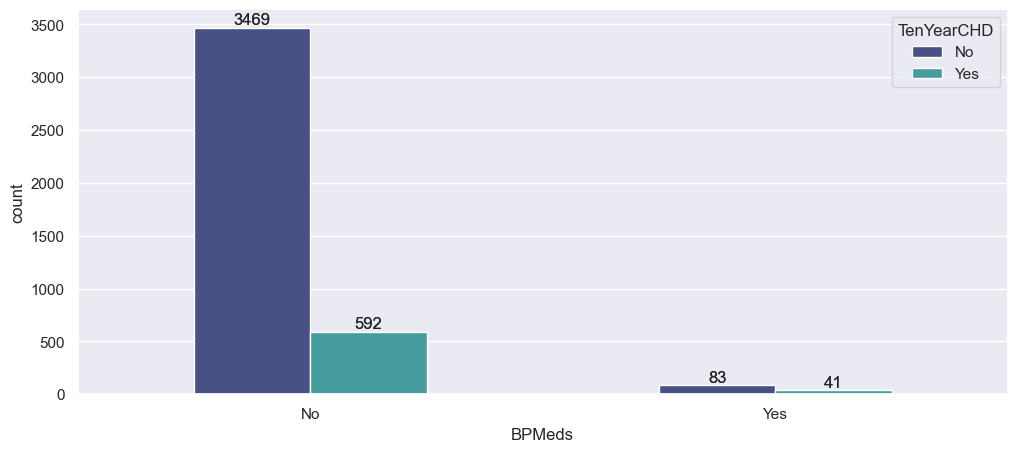

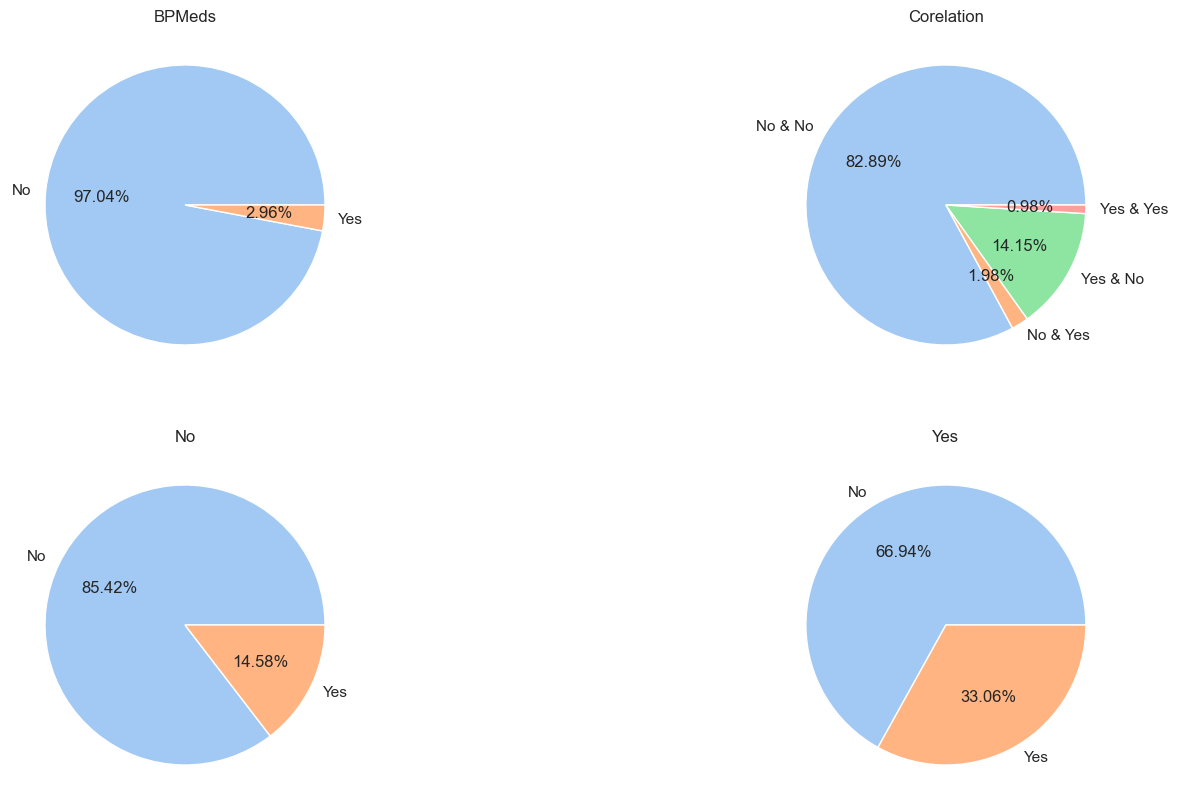

In [187]:
cat_vis('BPMeds','TenYearCHD')

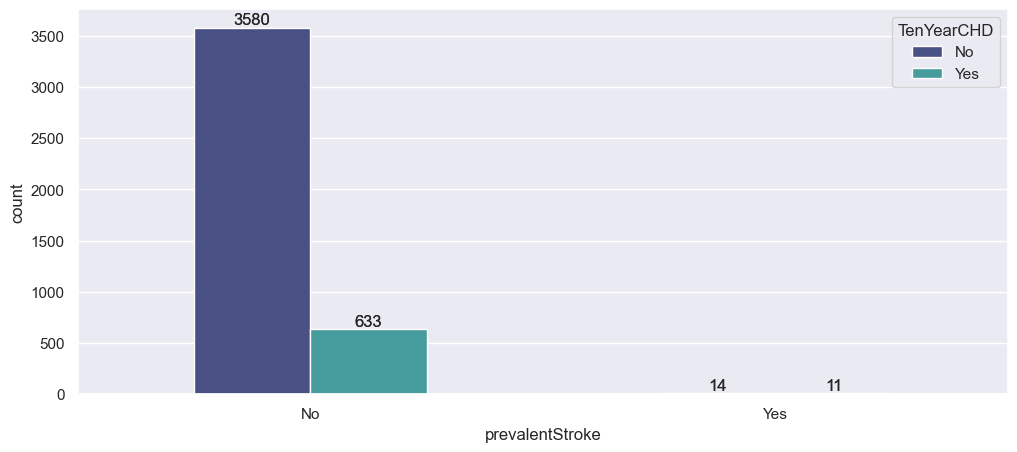

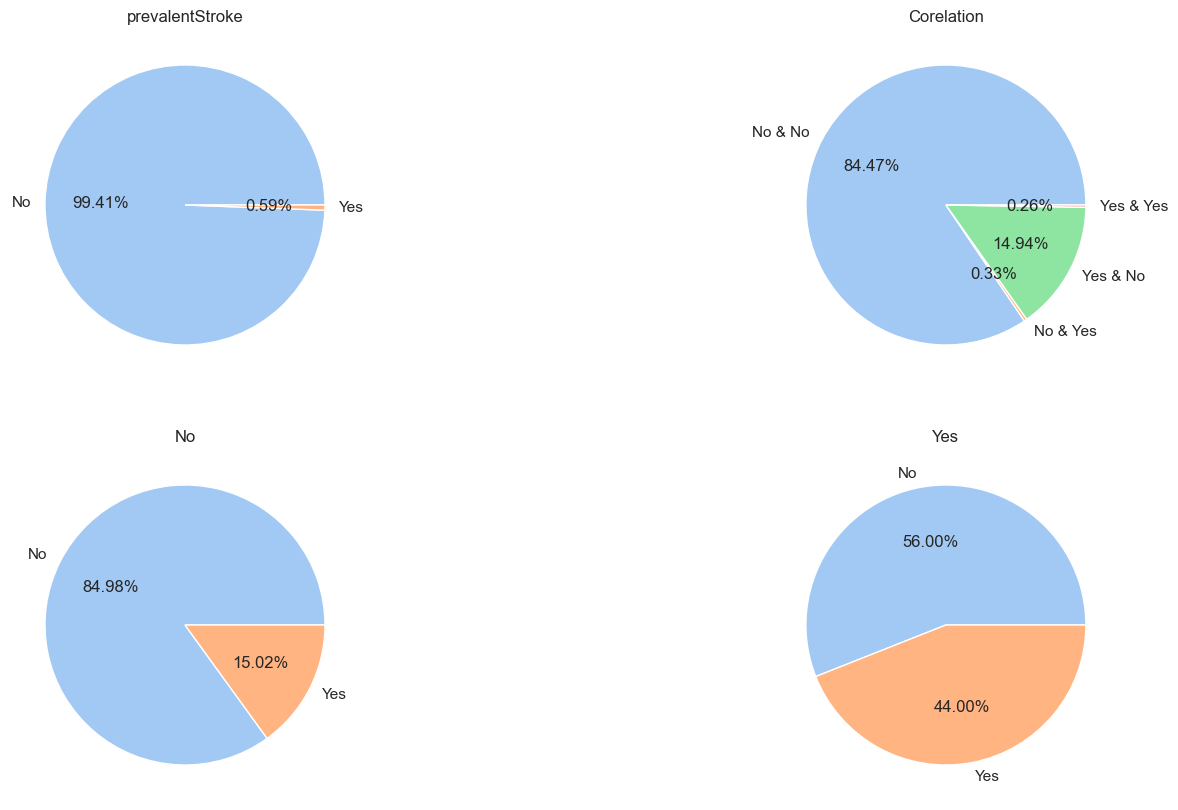

In [188]:
cat_vis('prevalentStroke','TenYearCHD')

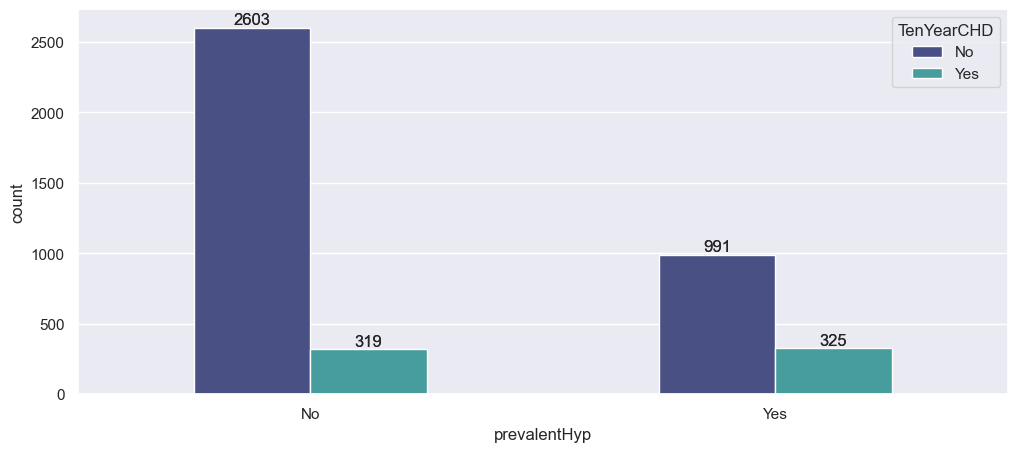

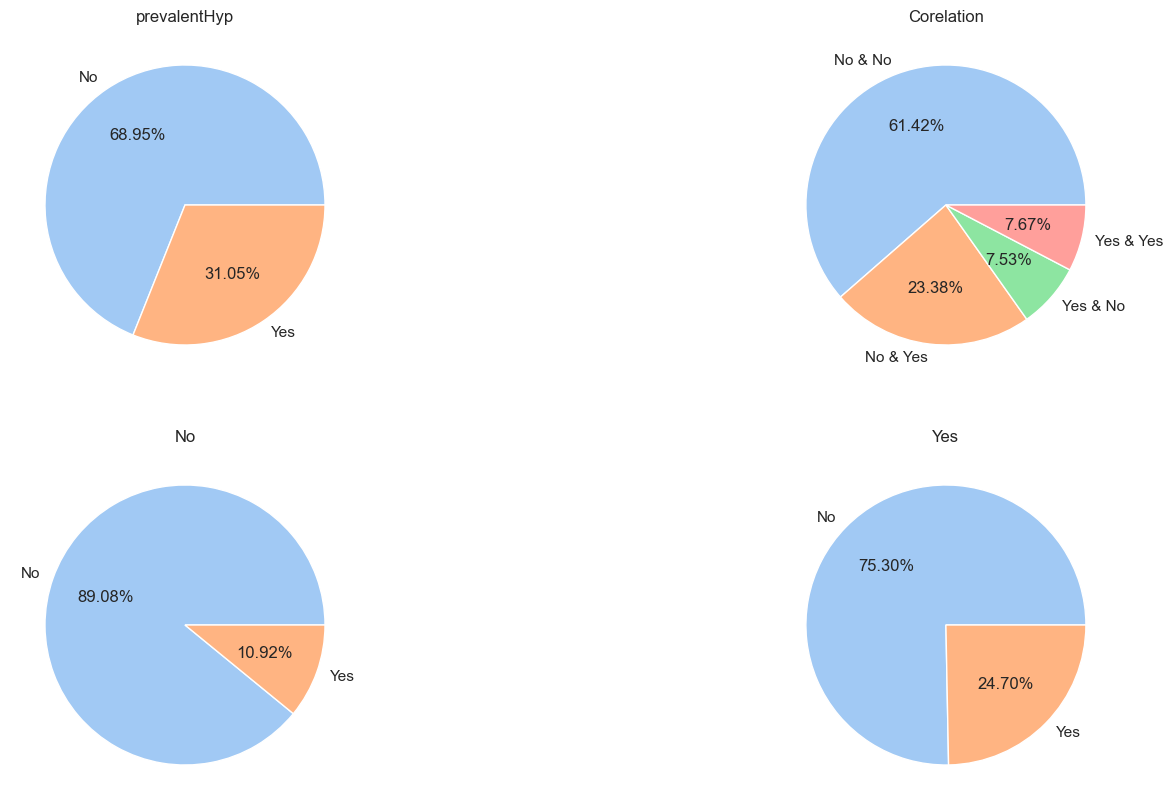

In [189]:
cat_vis('prevalentHyp','TenYearCHD')

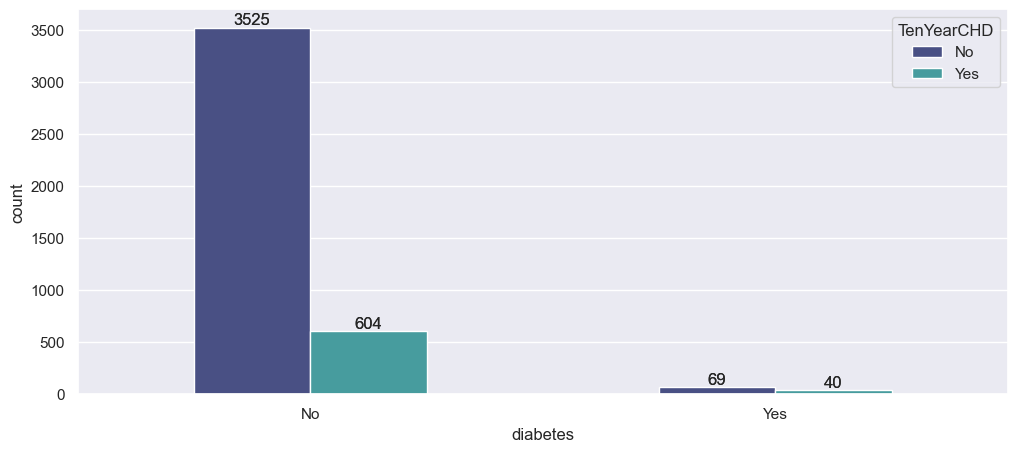

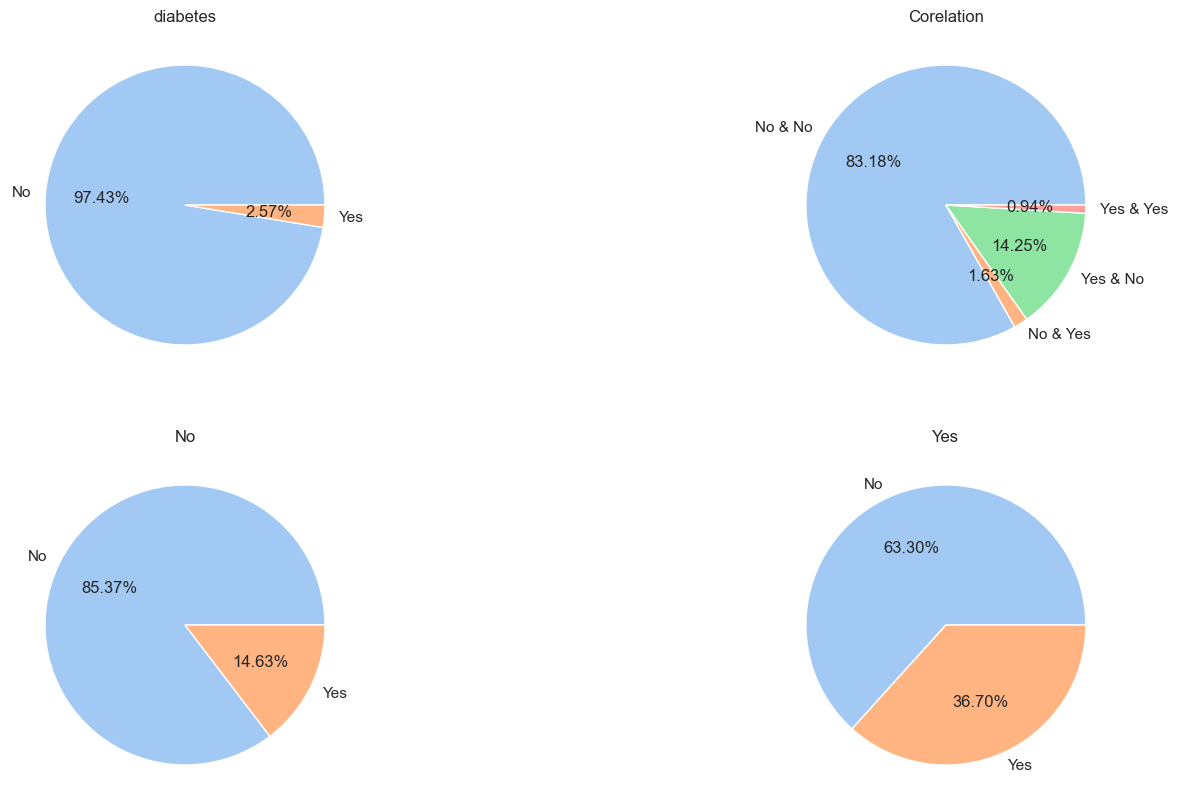

In [190]:
cat_vis('diabetes','TenYearCHD')

In [191]:
df['age'].describe()

count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

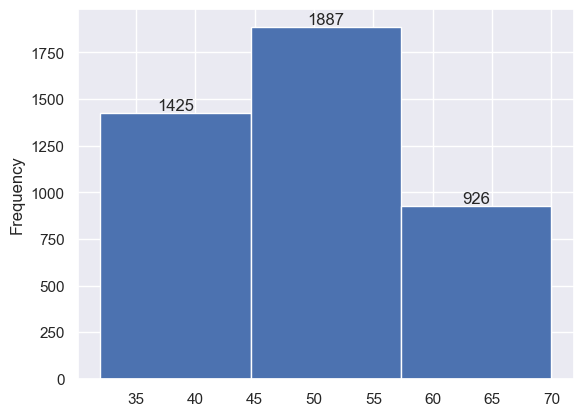

In [192]:
ax = df['age'].plot.hist(bins=3)
ax.bar_label(ax.containers[0])
plt.show()

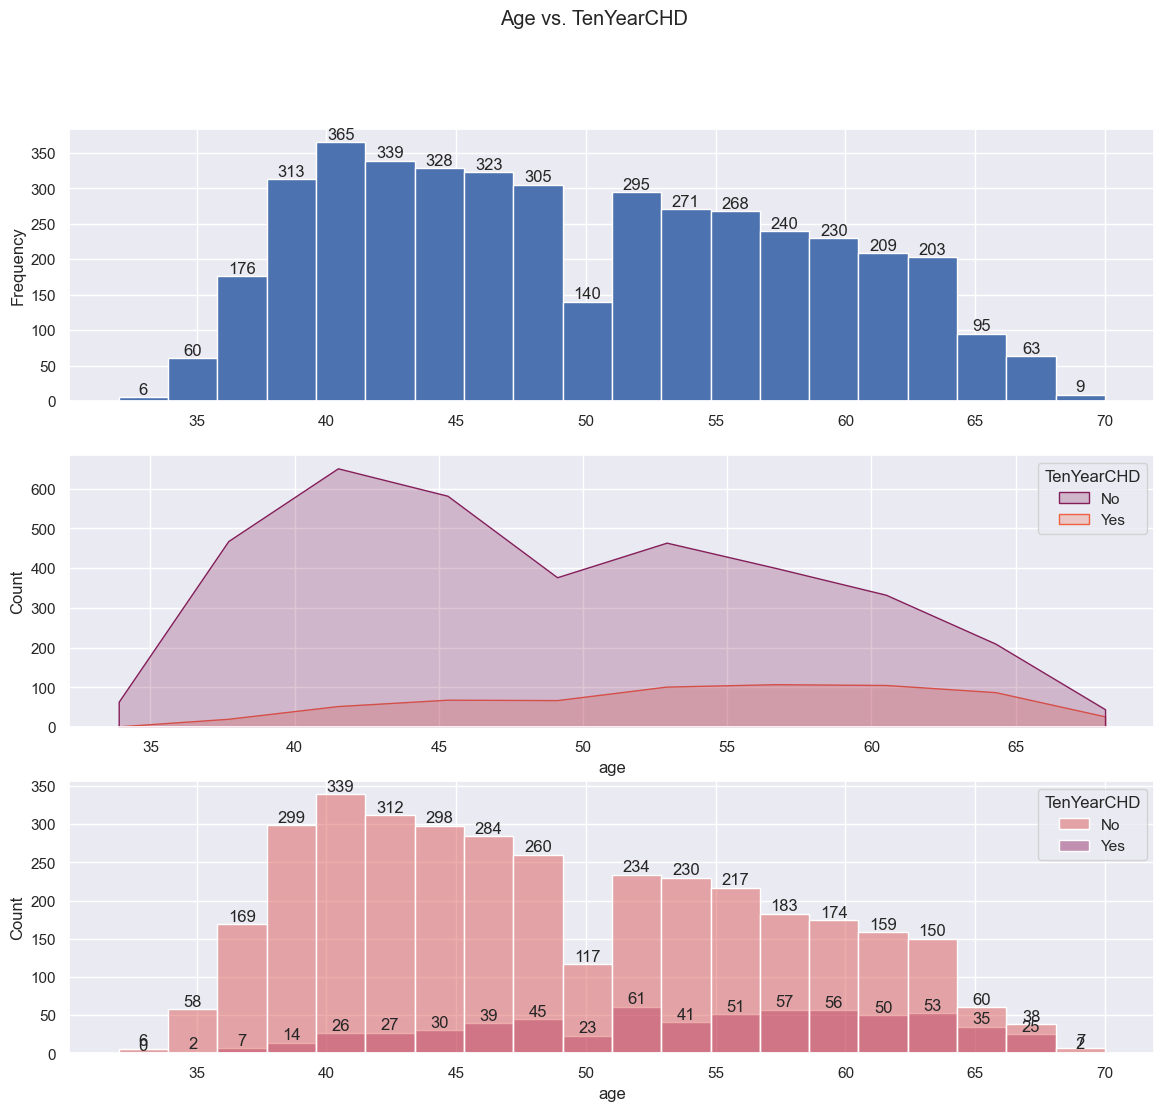

In [193]:
f, axes = plt.subplots(3, 1)
f.set_size_inches(14,12)
f.suptitle('Age vs. TenYearCHD')
# ax = sns.histplot(data=df,x='age',bins=10,ax=axes[0],kde=True)
ax = df['age'].plot.hist(bins=20,ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.histplot(data=df,x='age',hue='TenYearCHD',element='poly',bins=10,ax=axes[1],palette='rocket')
ax = sns.histplot(data=df,x='age',bins=20,hue='TenYearCHD',palette='flare',ax=axes[2])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [194]:
df['age'] = df['age'].apply(lambda x: '< 47' if x<47 else '>= 47')

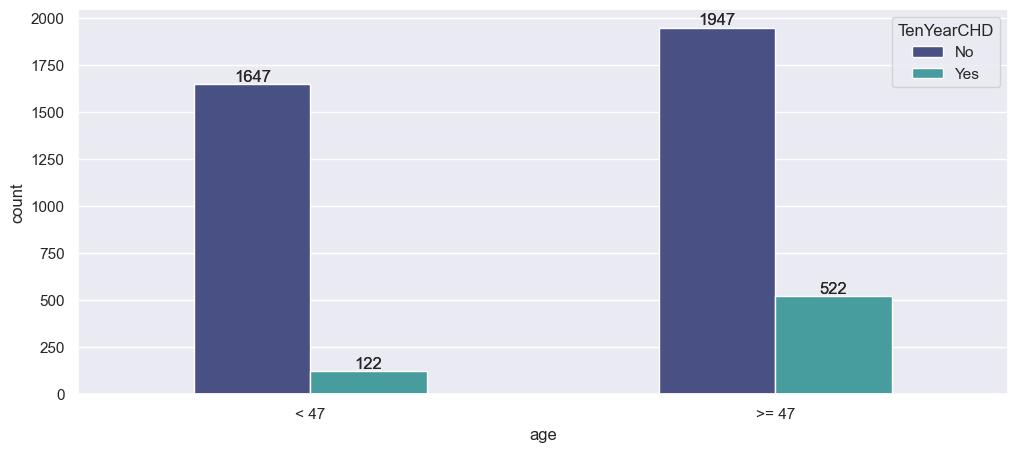

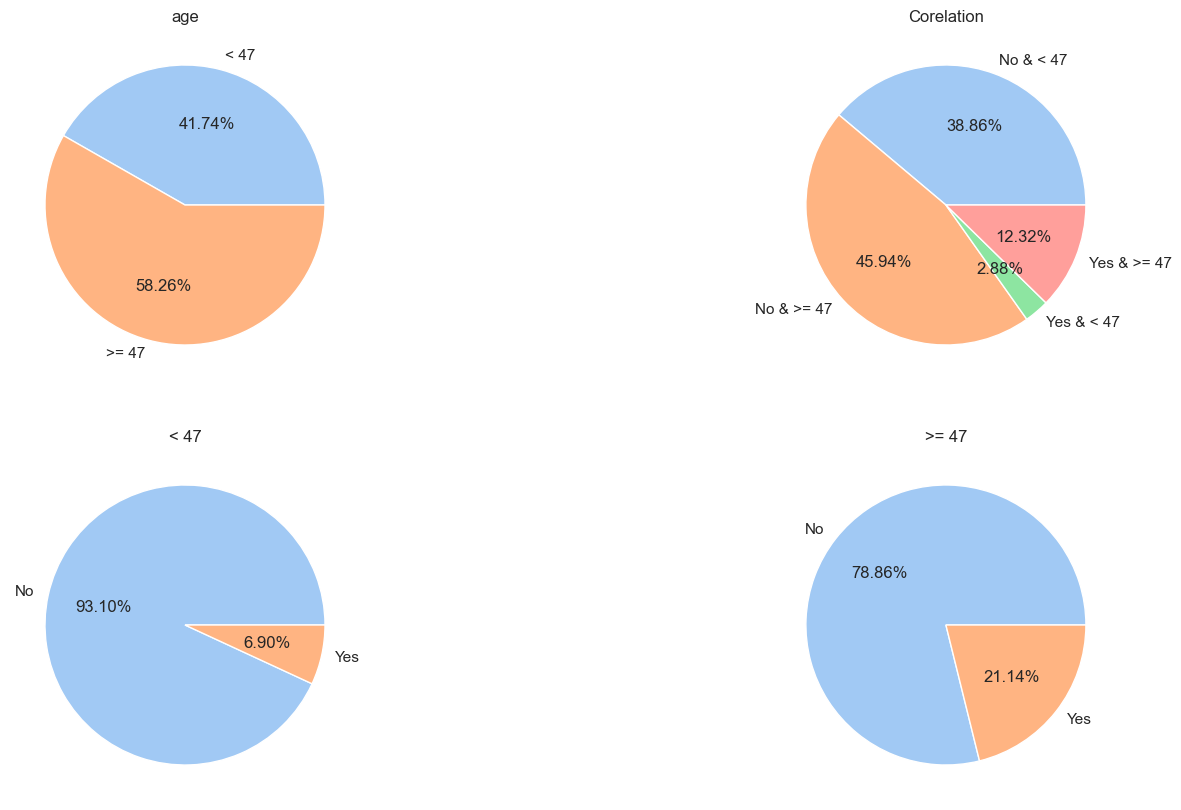

In [195]:
cat_vis('age','TenYearCHD')

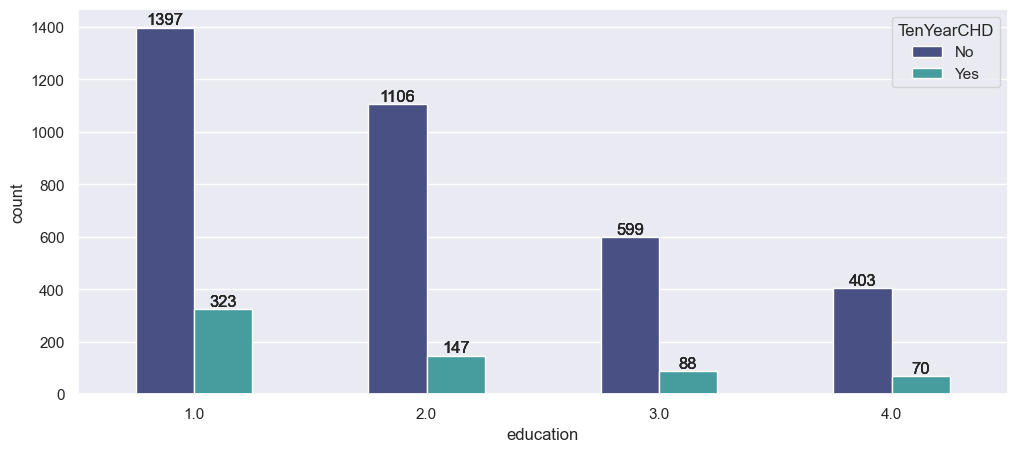

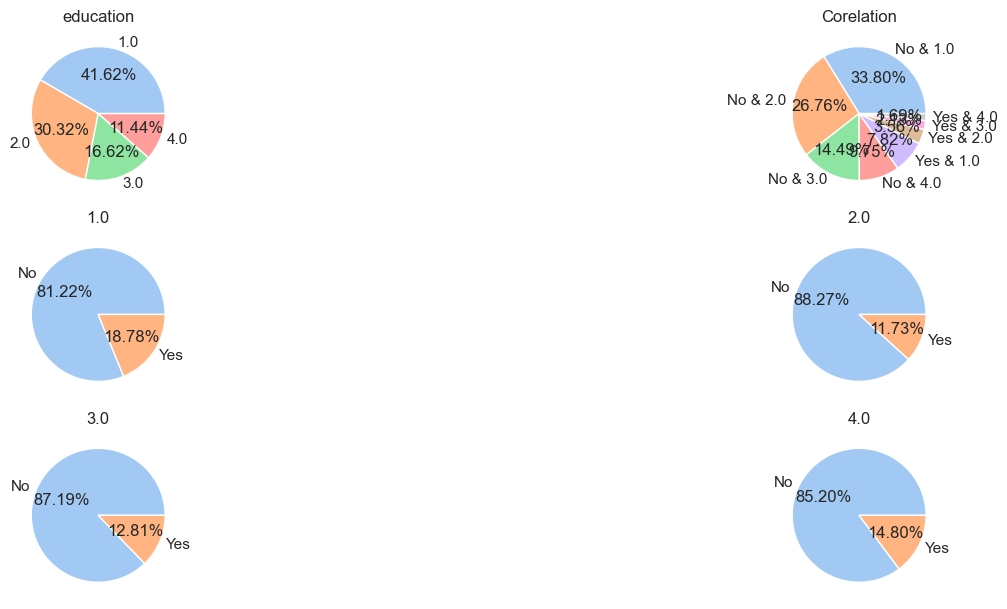

In [196]:
cat_vis('education','TenYearCHD')

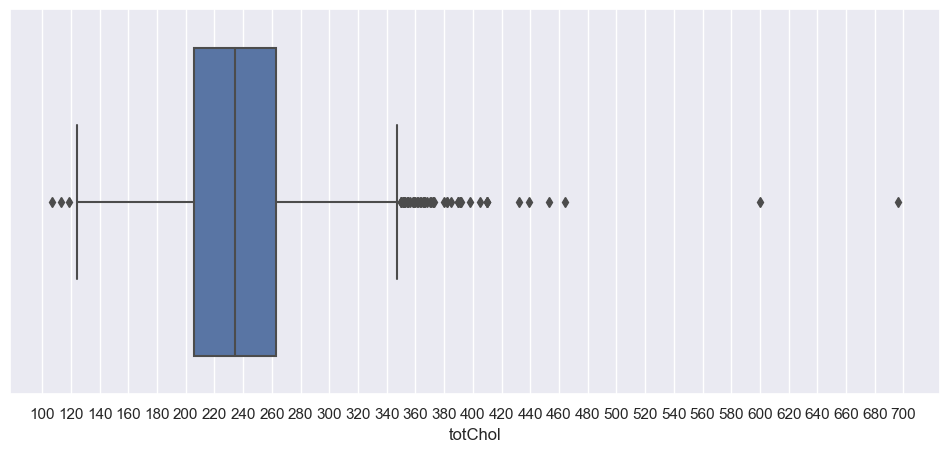

In [197]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='totChol')
plt.xticks(range(100,701,20))
plt.show()

In [198]:
df[df['totChol'] > 345].shape,df[df['totChol'] < 125].shape,(65/df.shape[0])*100

((61, 16), (4, 16), 1.5337423312883436)

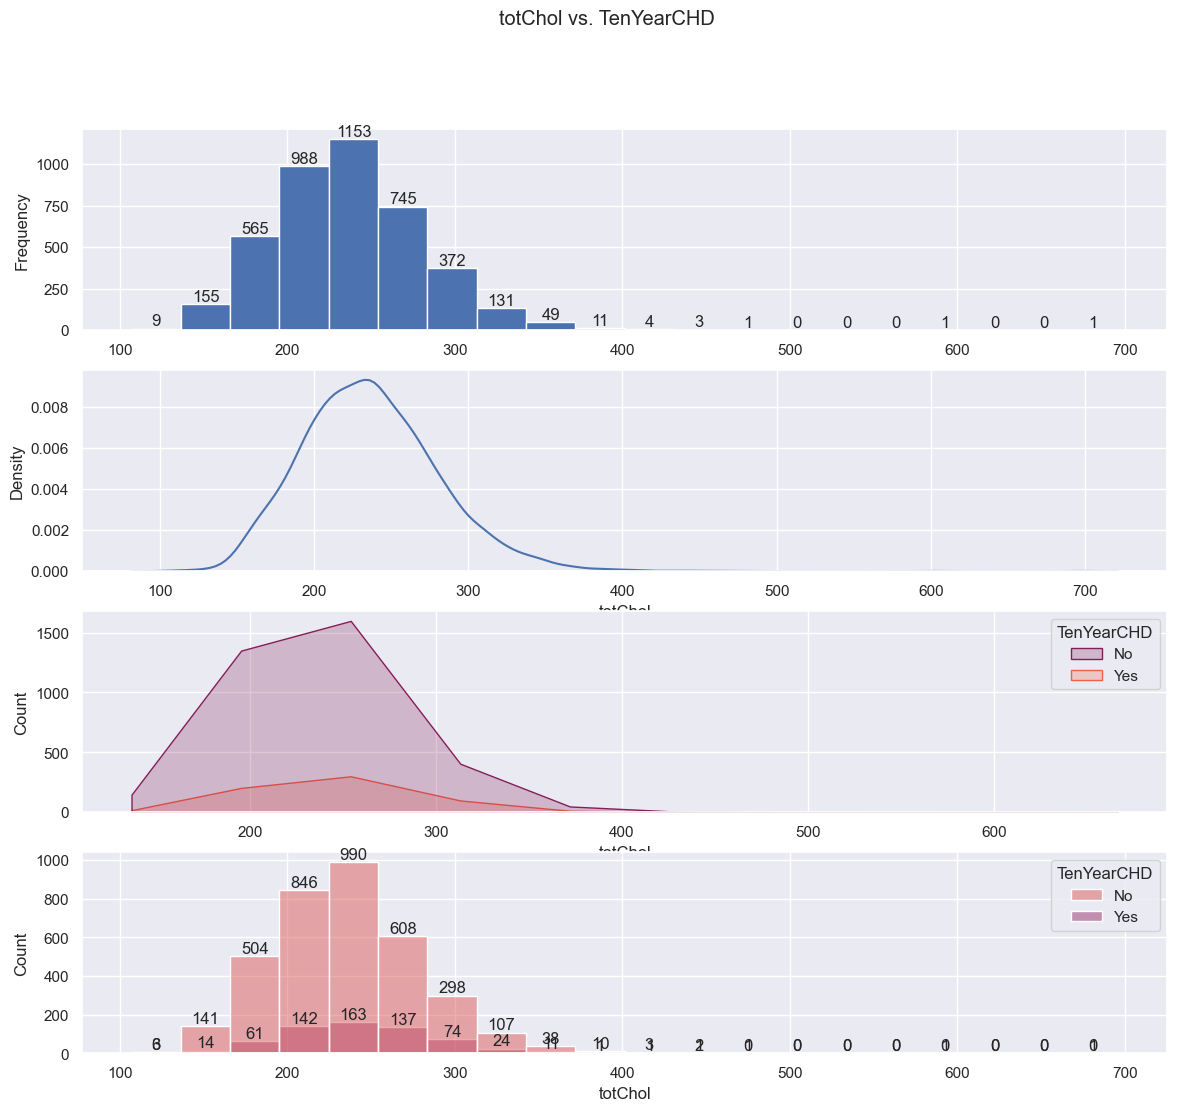

In [199]:
f, axes = plt.subplots(4, 1)
f.set_size_inches(14,12)
f.suptitle('totChol vs. TenYearCHD')
# ax = sns.histplot(data=df,x='age',bins=10,ax=axes[0],kde=True)
ax = df['totChol'].plot.hist(bins=20,ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.kdeplot(data=df,x='totChol',ax=axes[1])
ax = sns.histplot(data=df,x='totChol',hue='TenYearCHD',element='poly',bins=10,ax=axes[2],palette='rocket')
ax = sns.histplot(data=df,x='totChol',bins=20,hue='TenYearCHD',palette='flare',ax=axes[3])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

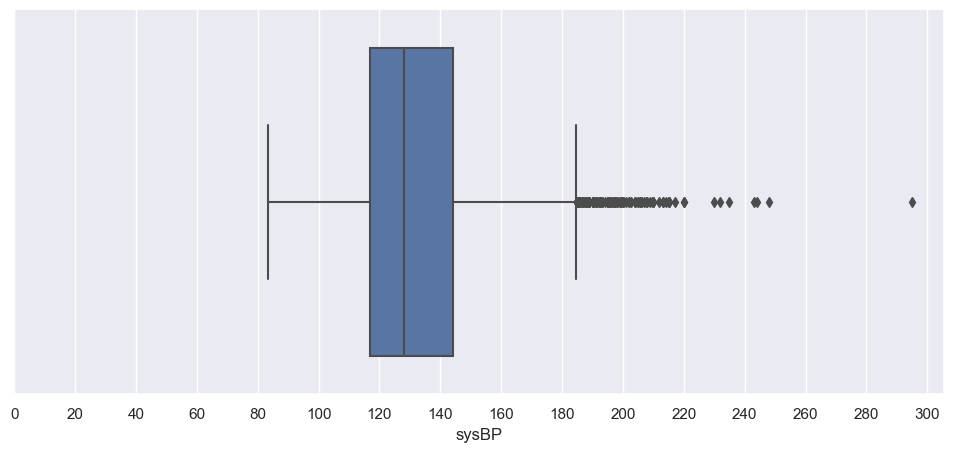

In [200]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='sysBP')
plt.xticks(range(0,301,20))
plt.show()

In [201]:
(df[df['sysBP']>181].shape[0]/df.shape[0])*100

3.5394053798961775

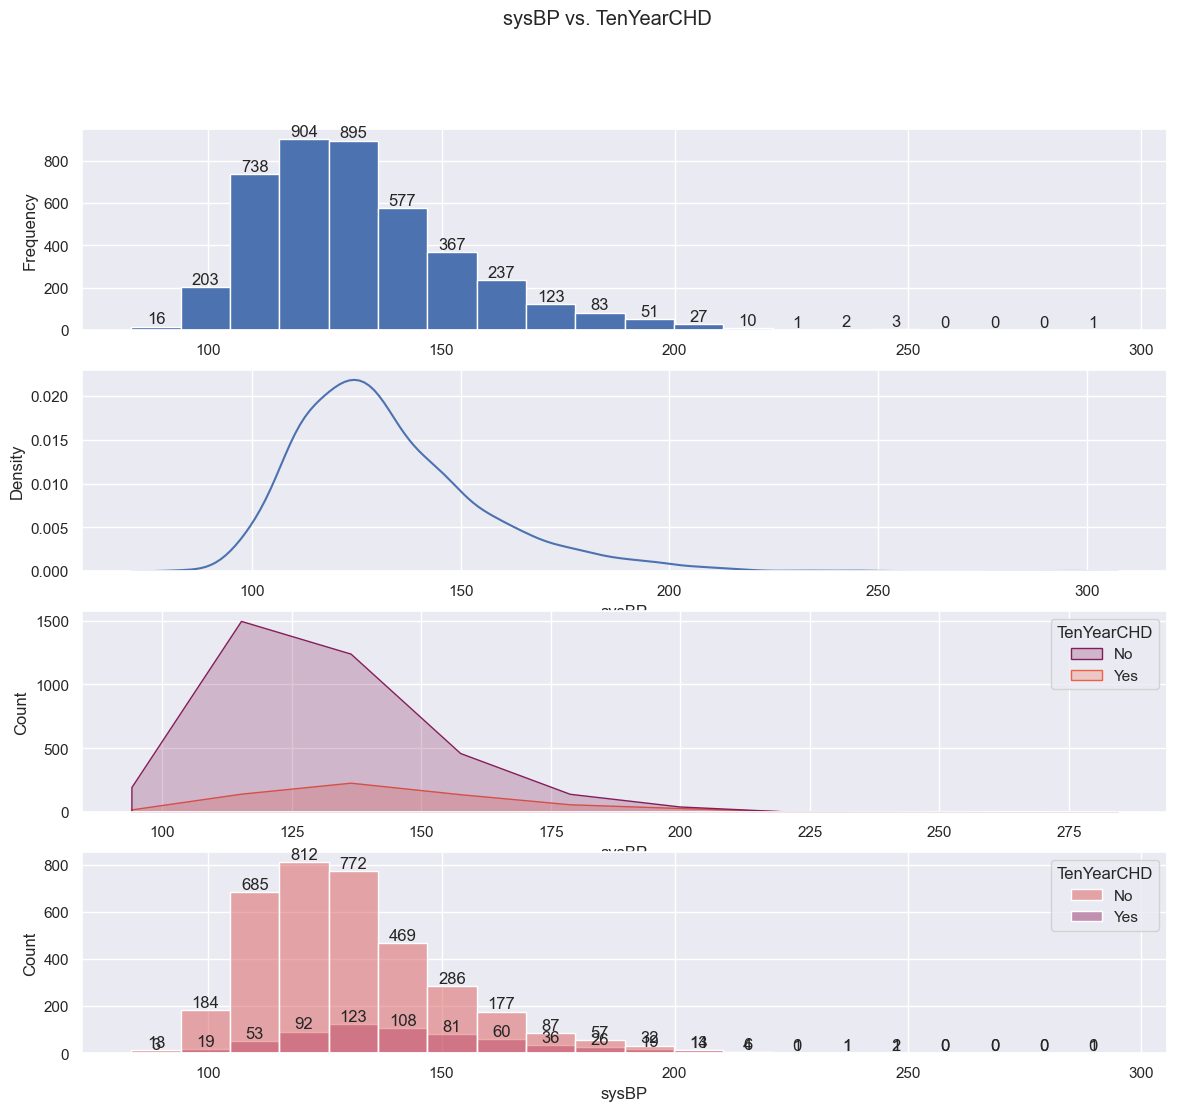

In [202]:
f, axes = plt.subplots(4, 1)
f.set_size_inches(14,12)
f.suptitle('sysBP vs. TenYearCHD')
# ax = sns.histplot(data=df,x='age',bins=10,ax=axes[0],kde=True)
ax = df['sysBP'].plot.hist(bins=20,ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.kdeplot(data=df,x='sysBP',ax=axes[1])
ax = sns.histplot(data=df,x='sysBP',hue='TenYearCHD',element='poly',bins=10,ax=axes[2],palette='rocket')
ax = sns.histplot(data=df,x='sysBP',bins=20,hue='TenYearCHD',palette='flare',ax=axes[3])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

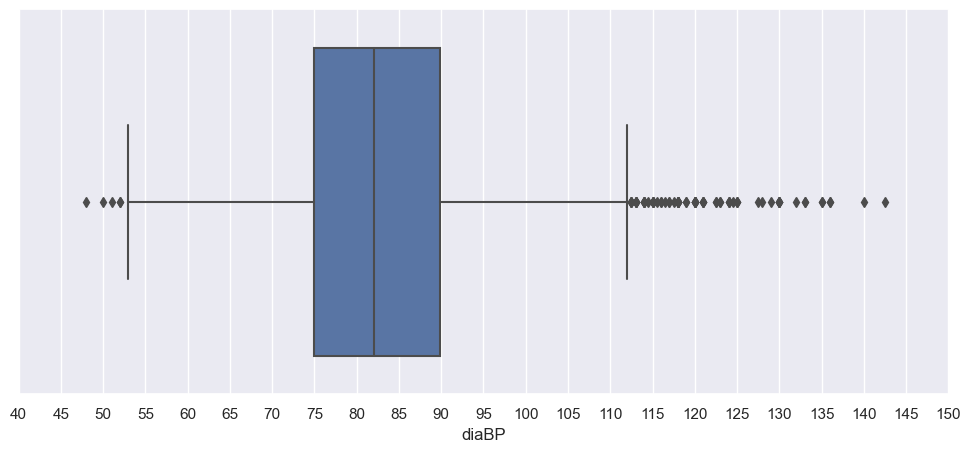

In [203]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='diaBP')
plt.xticks(range(40,151,5))
plt.show()

In [204]:
df[df['diaBP'] > 112].shape,df[df['diaBP'] < 53].shape,(81/df.shape[0])*100

((76, 16), (5, 16), 1.9112789051439358)

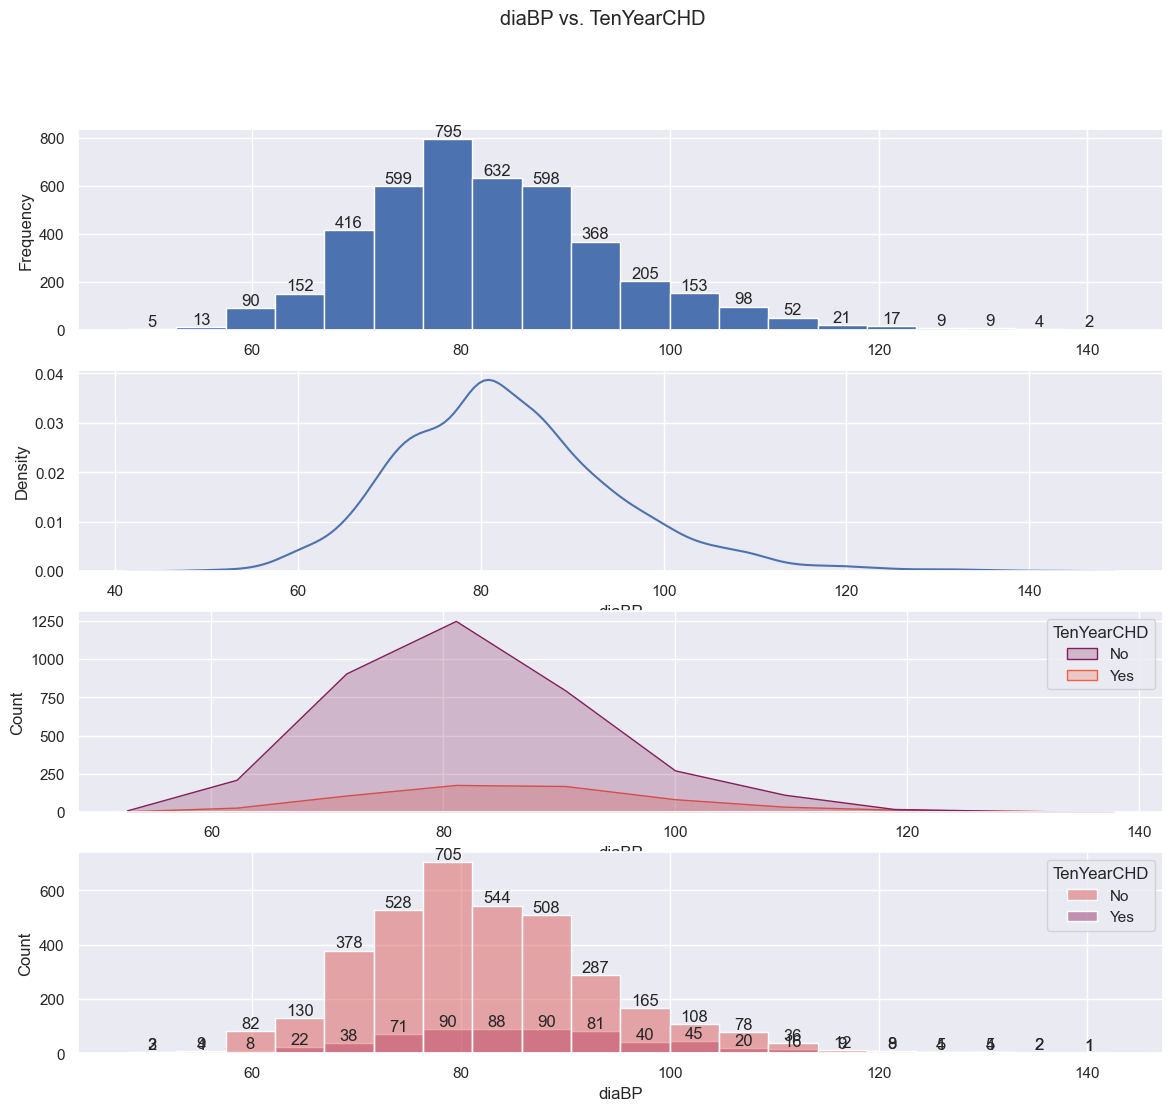

In [205]:
f, axes = plt.subplots(4, 1)
f.set_size_inches(14,12)
f.suptitle('diaBP vs. TenYearCHD')
# ax = sns.histplot(data=df,x='age',bins=10,ax=axes[0],kde=True)
ax = df['diaBP'].plot.hist(bins=20,ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.kdeplot(data=df,x='diaBP',ax=axes[1])
ax = sns.histplot(data=df,x='diaBP',hue='TenYearCHD',element='poly',bins=10,ax=axes[2],palette='rocket')
ax = sns.histplot(data=df,x='diaBP',bins=20,hue='TenYearCHD',palette='flare',ax=axes[3])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

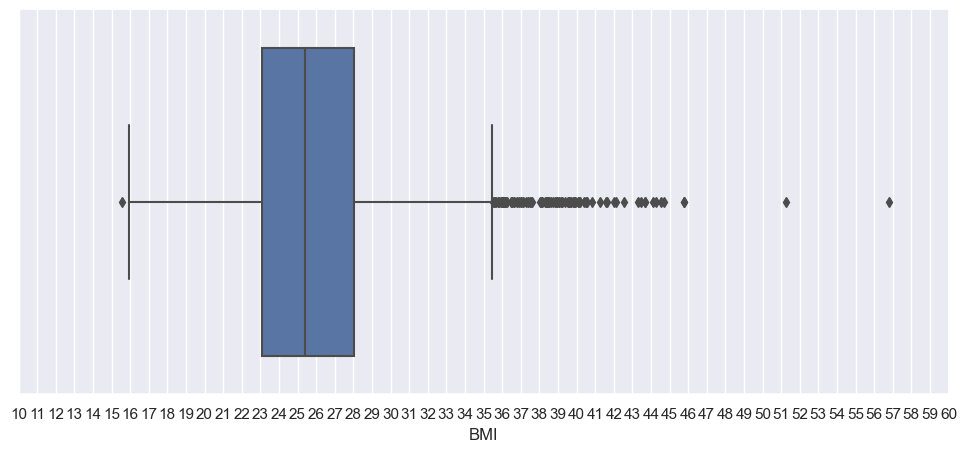

In [206]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='BMI')
plt.xticks(range(10,61,1))
plt.show()

In [207]:
df[df['BMI'] > 35.5].shape,df[df['BMI'] < 16].shape,(98/df.shape[0])*100

((96, 16), (2, 16), 2.3124115148655027)

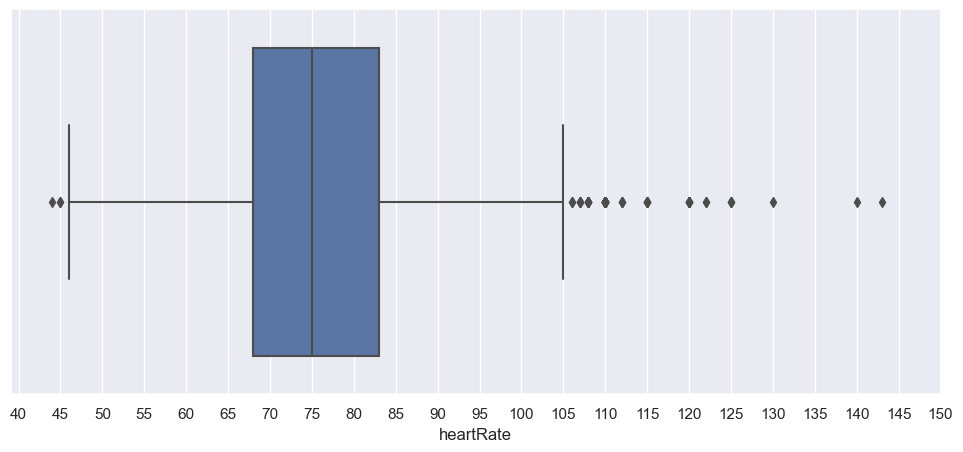

In [208]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='heartRate')
plt.xticks(range(40,151,5))
plt.show()

In [209]:
df[df['heartRate'] > 105].shape,df[df['heartRate'] < 46].shape,(76/df.shape[0])*100

((73, 16), (3, 16), 1.7932987258140631)

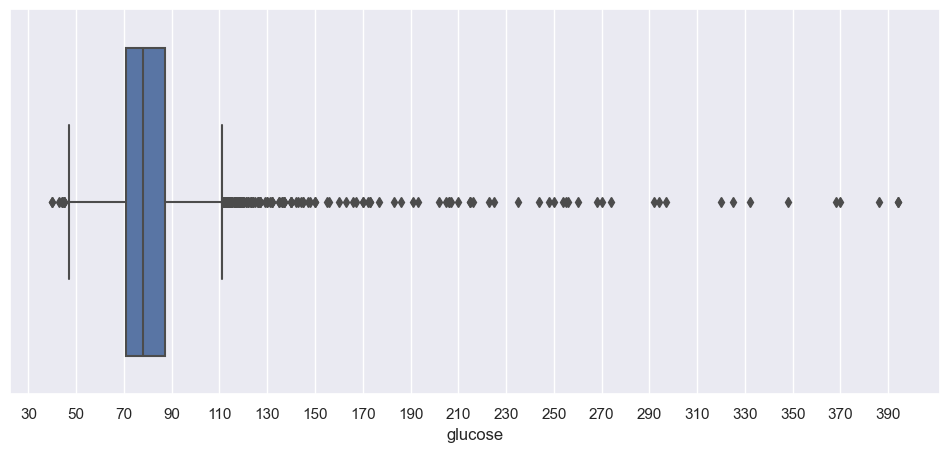

In [210]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='glucose')
plt.xticks(range(30,401,20))
plt.show()

In [211]:
df[df['glucose'] > 111].shape,df[df['glucose'] < 46].shape,(188/df.shape[0])*100

((179, 16), (9, 16), 4.436054742803209)

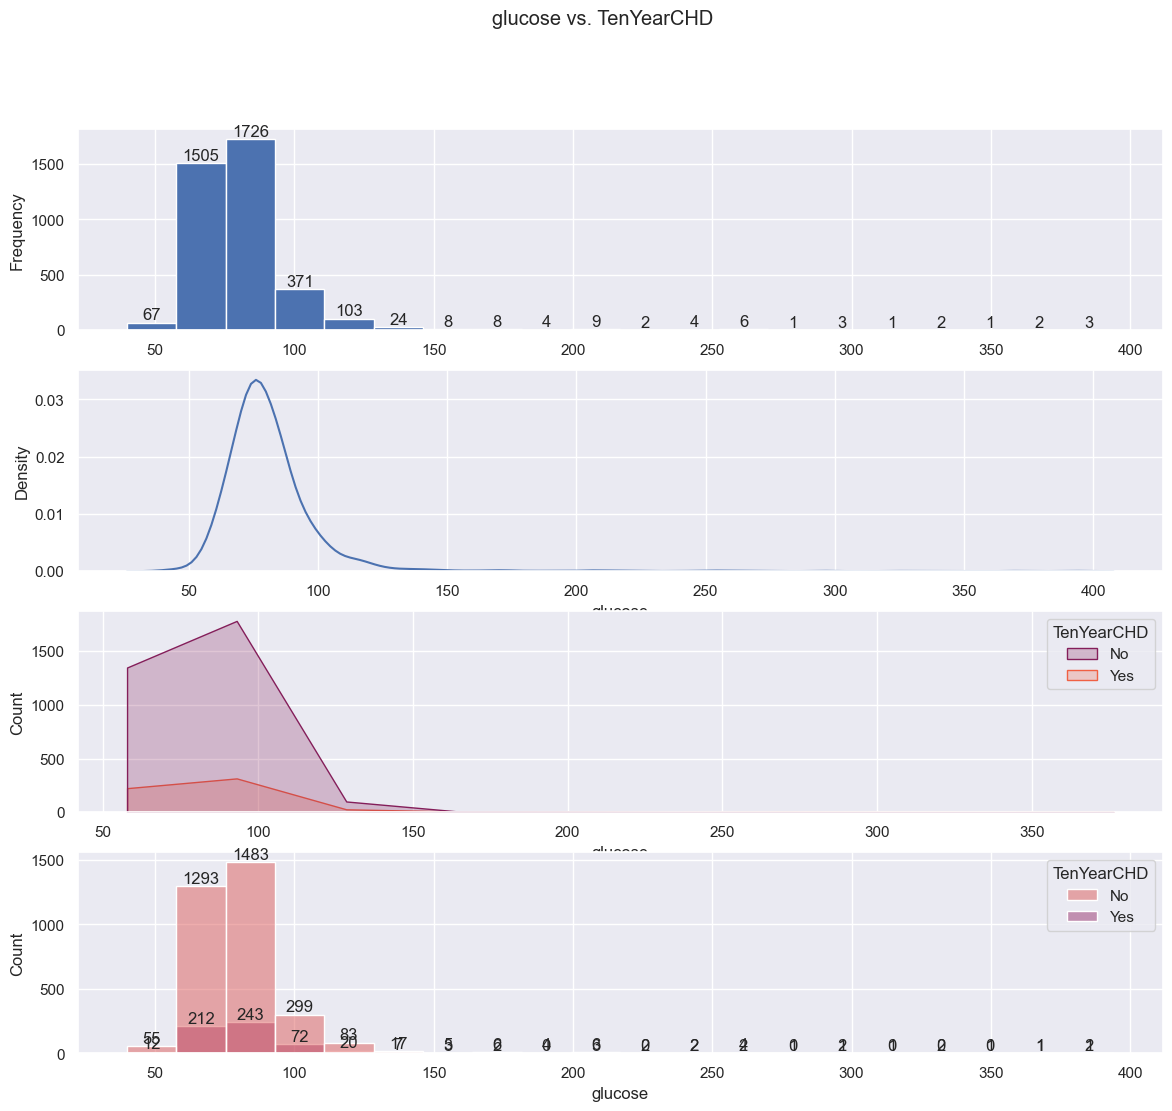

In [212]:
f, axes = plt.subplots(4, 1)
f.set_size_inches(14,12)
f.suptitle('glucose vs. TenYearCHD')
# ax = sns.histplot(data=df,x='age',bins=10,ax=axes[0],kde=True)
ax = df['glucose'].plot.hist(bins=20,ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.kdeplot(data=df,x='glucose',ax=axes[1])
ax = sns.histplot(data=df,x='glucose',hue='TenYearCHD',element='poly',bins=10,ax=axes[2],palette='rocket')
ax = sns.histplot(data=df,x='glucose',bins=20,hue='TenYearCHD',palette='flare',ax=axes[3])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [213]:
df['cigsPerDay'].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

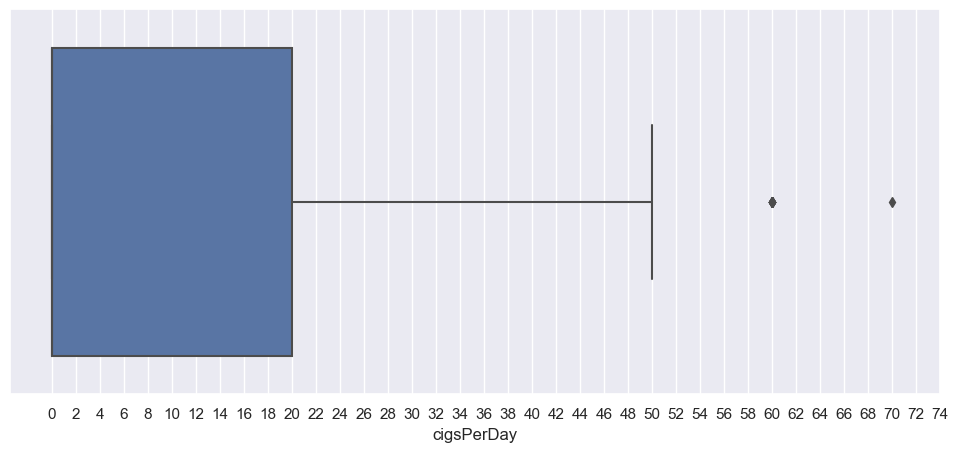

In [214]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='cigsPerDay')
plt.xticks(range(0,75,2))
plt.show()

In [215]:
df[df['cigsPerDay'] > 50].shape,(12/df.shape[0])*100

((12, 16), 0.28315243039169424)

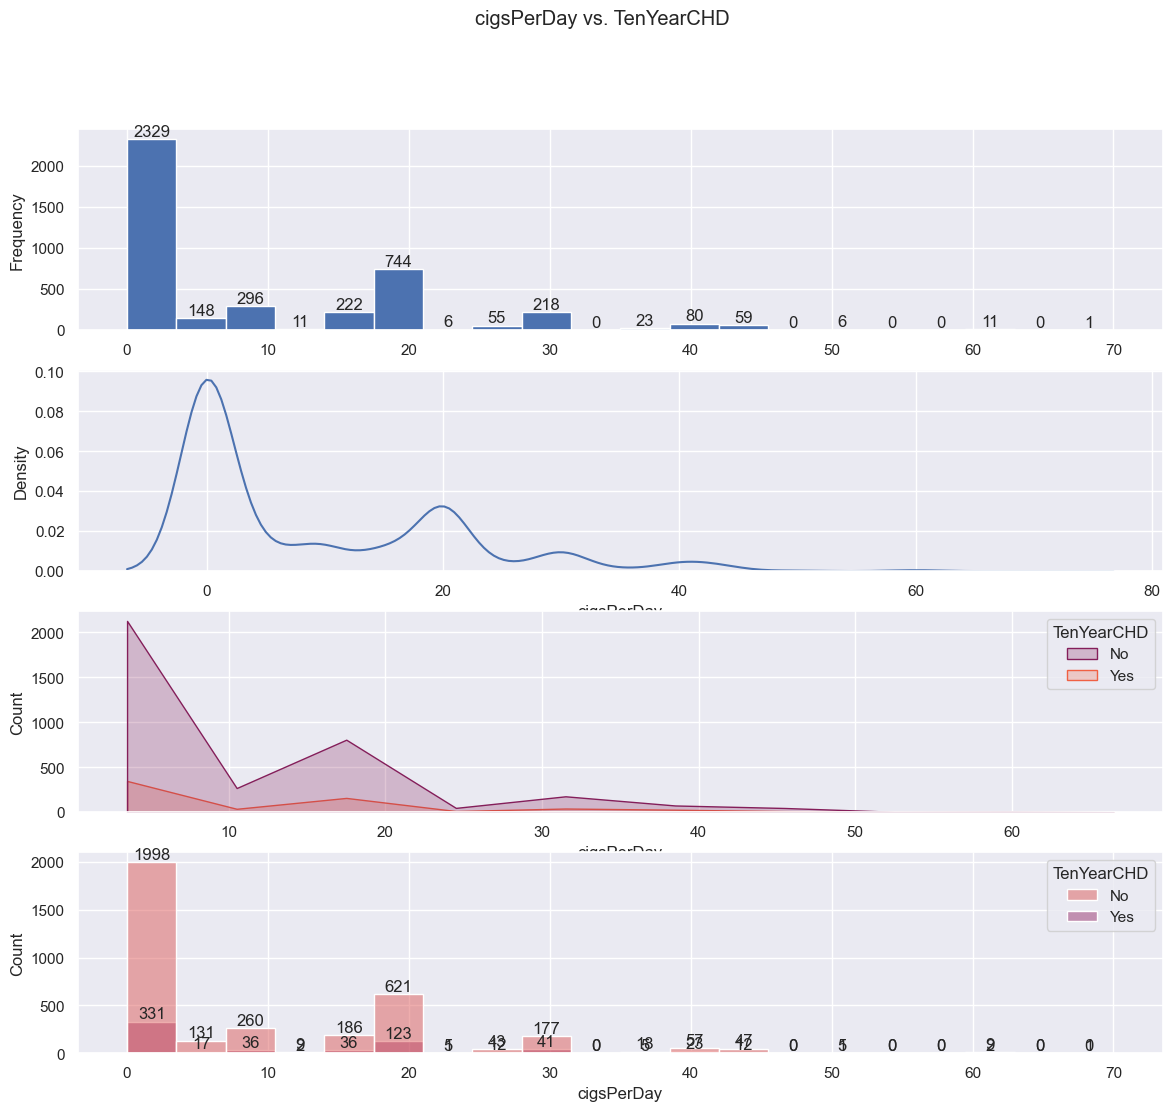

In [216]:
f, axes = plt.subplots(4, 1)
f.set_size_inches(14,12)
f.suptitle('cigsPerDay vs. TenYearCHD')
# ax = sns.histplot(data=df,x='age',bins=10,ax=axes[0],kde=True)
ax = df['cigsPerDay'].plot.hist(bins=20,ax=axes[0])
ax.bar_label(ax.containers[0])
ax = sns.kdeplot(data=df,x='cigsPerDay',ax=axes[1])
ax = sns.histplot(data=df,x='cigsPerDay',hue='TenYearCHD',element='poly',bins=10,ax=axes[2],palette='rocket')
ax = sns.histplot(data=df,x='cigsPerDay',bins=20,hue='TenYearCHD',palette='flare',ax=axes[3])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

`3. Work on Outliers:`

In [217]:
# sns.pairplot(df)

In [218]:
df.drop(index=[3844,833],inplace=True)
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)

`4. Work on NaN Values:`

In [219]:
df['education'].fillna(np.random.choice([1,2]),inplace=True)
df['cigsPerDay'].fillna(0,inplace=True)
df['heartRate'].fillna(75,inplace=True)
df['BMI'].fillna(np.random.choice([22,23,25]),inplace=True)
df['BPMeds'].fillna('No',inplace=True)
# df['BPMeds'].fillna(0,inplace=True)
df['totChol'].fillna(np.random.choice([234,236,240]),inplace=True)
df['glucose'].fillna(np.random.choice([75,78,81]),inplace=True)

`5. Feature Scaling:`

In [220]:
df.drop(columns='currentSmoker',inplace=True)

In [221]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['TenYearCHD'])
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [222]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

continues_data = ColumnTransformer(
    transformers=[(
        'outlier_scaling', StandardScaler(), ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
    )], remainder='passthrough'
)
ordinal_data = ColumnTransformer(
    transformers=[
        ('ordinal_data', OrdinalEncoder(categories=[['>= 47','< 47'],['Yes','No'],['Yes','No'],['Yes','No'],['Yes','No']],dtype='int32'), [8,10,11,12,13])
    ], remainder='passthrough'
)
nominal_data = ColumnTransformer(
    transformers=[
        ('nominal_data', OneHotEncoder(dtype='int32'), [12])
    ], remainder='passthrough'
)

In [246]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(
    steps=[
        ('continues_data',continues_data),
        ('ordinal_data',ordinal_data),
        ('nominal_data',nominal_data),
        ('model',LogisticRegression(penalty='l1',solver='saga',n_jobs=-1)),
    ]
)
pipeline.fit(x_train.copy(),y_train.copy())
pipeline.score(x_test,y_test)

0.8490566037735849

In [247]:
from sklearn.model_selection import GridSearchCV

param_grid = {'model__C': [0.1, 1, 10],
              'model__penalty': ['l1', 'l2'],
              'model__solver': ['liblinear', 'saga']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train.copy(), y_train.copy())

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Score: ", test_score)

Best Hyperparameters:  {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best Score:  0.8538938488821497
Test Score:  0.847877358490566
